In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!head -10 "../data/genome/Nucleosome_position_SerCer_chrV.txt"

chrV          233      2.17       4.340
chrV          414      2.02       4.040
chrV          617      0.49       0.766
chrV          740      0.49       0.980
chrV          989      0.67       1.340
chrV         1125      1.59       3.180
chrV         1301      0.41       0.820
chrV         1411      0.58       0.563
chrV         1752      3.85       0.951
chrV         1895      1.47       0.665


In [3]:
df = pd.read_table("../data/genome/Nucleosome_position_SerCer_chrV.txt", sep=r"\s+", header=None)
df

,0,1,2,3
0,chrV,233,2.17,4.340
1,chrV,414,2.02,4.040
2,chrV,617,0.49,0.766
3,chrV,740,0.49,0.980
4,chrV,989,0.67,1.340
...,...,...,...,...
3187,chrV,575662,0.34,0.680
3188,chrV,576011,0.40,0.800
3189,chrV,576194,0.39,0.780
3190,chrV,576401,0.55,1.100


In [9]:
pos = df[1].to_numpy(dtype=int)
pos

array([   233,    414,    617, ..., 576194, 576401, 576551])

In [5]:
def plot_motif_enr_around_nuc(enr_around_nuc):

  mean_pos_enr_around_nuc = np.mean(enr_around_nuc, axis=0)
  avg_rng = 10

  num_pos = mean_pos_enr_around_nuc.shape[0]
  print(num_pos)
  cumsum = np.zeros(num_pos)
  running_avg = np.zeros(num_pos)
  for i in range(num_pos):
      cumsum[i] = mean_pos_enr_around_nuc[i]
      if i > 0:
          cumsum[i] += cumsum[i-1]

  for i in range(num_pos):
      start_pos = max(0, i - avg_rng)
      end_pos = min(num_pos-1, i + avg_rng)
      running_avg[i] = cumsum[end_pos]
      if start_pos > 0:
          running_avg[i] -= cumsum[start_pos-1]
      running_avg[i] /= (end_pos - start_pos + 1)

  plt.plot(np.arange(-150, 150), running_avg, linewidth=3)
  plt.axvline(0, color='black', linestyle='dashed', linewidth=2)
  plt.axvspan(-45, 45, color='green', alpha=.25)
  plt.axvspan(50, 125, color='red', alpha=.25)
  plt.axvspan(-50, -125, color='red', alpha=.25)

  ax = plt.gca()

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  hi = np.max(running_avg)
  mid = np.mean(running_avg)
  lo = np.min(running_avg)

  print(hi, mid, lo)

  ax.spines['bottom'].set_bounds((-150, 150))
  ax.spines['left'].set_bounds((lo, hi))
  ax.set_yticks([lo, mid, hi])
  ax.set_yticklabels([str(round(lo, 5)), str(round(mid, 5)), str(round(hi, 5))], fontsize=25)
  ax.set_xticks([-150, 0, 150])
  ax.set_xticklabels(['-150', '0', '150'], fontsize=25)
  ax.spines['bottom'].set_linewidth(3)
  ax.spines['left'].set_linewidth(3)
  ax.xaxis.set_tick_params(width=3)
  ax.yaxis.set_tick_params(width=3)

  plt.xlabel('Position from nucleosomes', fontsize=25)
  plt.ylabel(f'Enrichment of motif', fontsize=25)

  plt.gcf().set_size_inches(7, 5)

  # plt.savefig('plot_.svg', format='svg')
  plt.show()

In [7]:
# Only matching scores of #137 and #245 is uploaded in the repo

motif_num = 137

motif_enr = np.loadtxt(f"../data/motif_matching_scores/motif_{motif_num}.txt").clip(min=0)

In [10]:
enr_around_nuc = []
rng = 150
for i in range(pos.shape[0]):
  enr_around_nuc.append(motif_enr[pos[i]-rng:pos[i]+rng])
enr_around_nuc = np.vstack(enr_around_nuc)

300
0.0008201408167364122 0.0007311769541071602 0.0006573825585545927


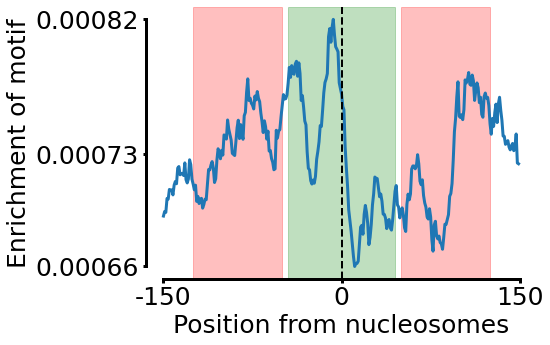

In [11]:
plot_motif_enr_around_nuc(enr_around_nuc)